In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import seaborn as sns


from datetime import datetime

In [ ]:
folder_path = "/content/drive/MyDrive/Efishery/dataset/"

df = pd.DataFrame()

list_of_dfs = [pd.read_excel(os.path.join(folder_path,i)) for i in os.listdir(folder_path)]

In [ ]:
data = pd.concat(list_of_dfs, ignore_index=True)
print(f"shape: {data.shape}")
print(f"total unique timestamp: {len(data['timestamp'].unique())}")

shape: (28392, 5)
total unique timestamp: 28392


In [ ]:
axis_data = data.drop('label', axis=1)
axis_data = axis_data.melt('timestamp', var_name='axis', value_name='value')
joined = data.join(axis_data.set_index('timestamp'), on='timestamp', how='left')
joined['event_time'] = [datetime.fromtimestamp(i/1000) for i in joined['timestamp']]

In [ ]:
data

,timestamp,x,y,z,label
0,1657093202000,-4,231,37,1
1,1657093202040,7,232,33,1
2,1657093202080,10,234,37,1
3,1657093202120,4,242,43,1
4,1657093202160,0,260,46,1
...,...,...,...,...,...
28387,1657094337480,-1,243,42,0
28388,1657094337520,-1,244,41,0
28389,1657094337560,0,244,43,0
28390,1657094337600,-2,246,44,0


In [ ]:
joined

,timestamp,x,y,z,label,axis,value,event_time
0,1657093202000,-4,231,37,1,x,-4,2022-07-06 07:40:02.000
0,1657093202000,-4,231,37,1,y,231,2022-07-06 07:40:02.000
0,1657093202000,-4,231,37,1,z,37,2022-07-06 07:40:02.000
1,1657093202040,7,232,33,1,x,7,2022-07-06 07:40:02.040
1,1657093202040,7,232,33,1,y,232,2022-07-06 07:40:02.040
...,...,...,...,...,...,...,...,...
28390,1657094337600,-2,246,44,0,y,246,2022-07-06 07:58:57.600
28390,1657094337600,-2,246,44,0,z,44,2022-07-06 07:58:57.600
28391,1657094337640,-2,246,43,0,x,-2,2022-07-06 07:58:57.640
28391,1657094337640,-2,246,43,0,y,246,2022-07-06 07:58:57.640


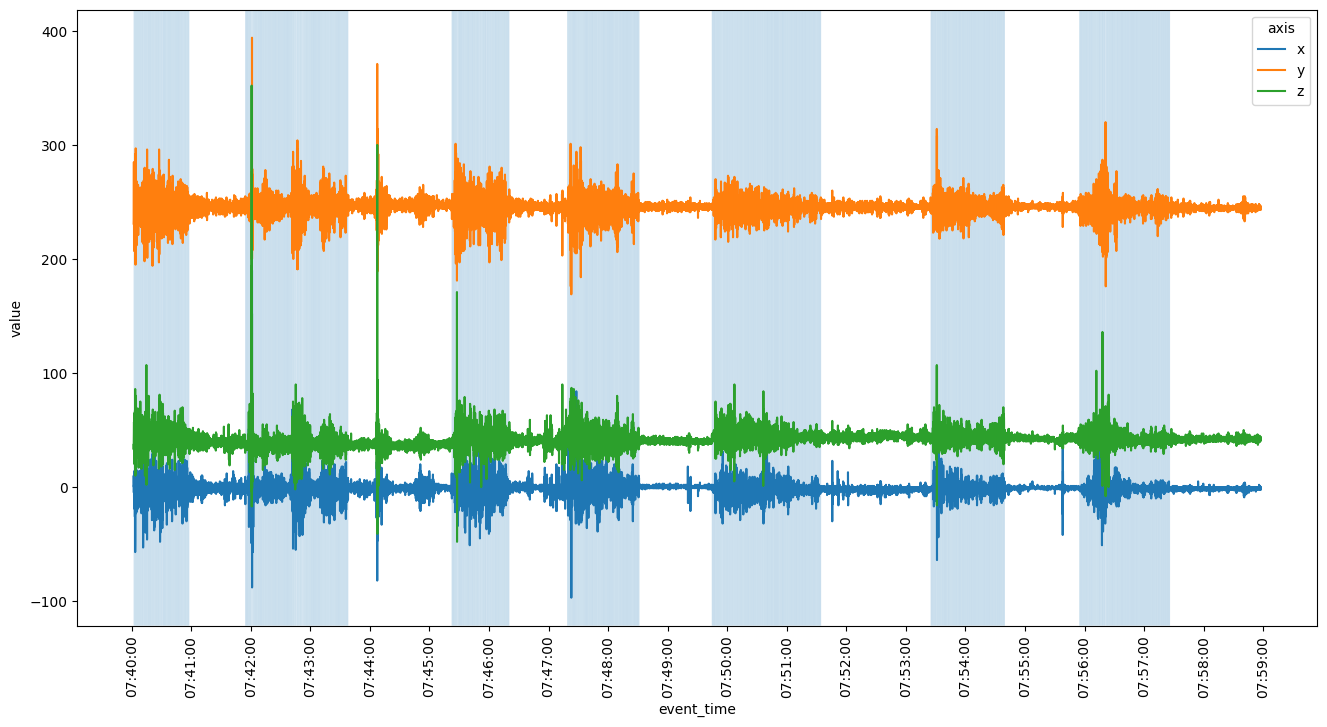

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(joined, x='event_time', y='value', hue='axis', ax=ax)
ax.fill_between(joined['event_time'], joined['value'], where=joined['label']==1, alpha=0.25, transform=ax.get_xaxis_transform())
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()